In [1]:
import ROOT as rt
import sys
import os
import Plotting as plot
sys.path.append(os.getcwd())
from quantileRegression import quantileRegression, setupJoblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
%matplotlib inline
#reload(plt)
plt.style.use('seaborn-talk')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,8)
import copy as cp



Welcome to ROOTaaS 6.06/08


In [2]:
# Variable you want to correct
ylist = ["R9", "S4", "SigmaIeIe", "EtaWidth", "PhiWidth", "CovarianceIphiIphi",'CovarianceIetaIphi']
# Input variables used for the regression
X = ['Pt', 'ScEta', 'Phi', 'rho']  # <<-- list
n_jobs=30
quantiles = [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [3]:
# Upload Dataframes:
i= str(1)
periods=[1,2,3,4,5]
qr_mc1= quantileRegression("mc")
qr_mc2= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc1.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_"+i+".h5", 0, -1)
qr_mc2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_"+i+".h5", 0, -1)
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_"+i+".h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_1.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000
Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_1.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


In [4]:
qr_mc1.correctAllY(X, ylist, quantiles,EBEE="EB", relativePath= "weights_Period_"+i) 
qr_mc2.correctAllY(X, ylist, quantiles,EBEE="EE", relativePath= "weights_Period_"+i) 
dfmc1= qr_mc1.getDF() 
dfmc2= qr_mc2.getDF() 
frame2 = [dfmc1, dfmc2] 
data2 = pd.concat(frame2) 
qr_mc= quantileRegression("mc")
qr_mc.df = data2.reset_index(drop=True) 
qr_mcPhoIso0=cp.deepcopy(qr_mc)
qr_dataPhoIso0=cp.deepcopy(qr_data)
qr_mcPhoIso0.df['PhoIso03']=0
qr_dataPhoIso0.df['PhoIso03']=0
qr_mcPhoIso0.df['PhoIso03_corr']=0

Loading corrected targets from :  correctedTargetsweights_Period_1_EB.h5
Loading corrected targets from :  correctedTargetsweights_Period_1_EE.h5


In [5]:
%time qr_mc.correctPhoIso("../phoIsoStoch/corrections_hybrid.root",n_jobs=n_jobs)

Computing corrected photon isolation using /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/../phoIsoStoch/corrections_hybrid.root


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:    1.5s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:    1.6s remaining:   23.3s
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:    2.3s remaining:   15.4s
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:    2.4s remaining:   10.1s
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:    2.5s remaining:    7.2s
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:    2.6s remaining:    5.5s
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:    2.8s remaining:    4.4s
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:    2.8s remaining:    3.4s
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:    2.8s remaining:    2.6s
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:    2.9s remaining:    2.1s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:    3.0s remaining:    1.7s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:    3.2s remaining:    1.3s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 1.96 s, sys: 992 ms, total: 2.95 s
Wall time: 4.2 s


[Parallel(n_jobs=30)]: Done  31 out of  31 | elapsed:    3.7s finished


In [6]:
showerShapes = ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4',"CovarianceIphiIphi"]

mvas = [ ("moriondPhoID",dict(correct=[], rhoSubtraction=True) ), 
#("moriondPhoIDcorrShowerShapes",dict(correct=showerShapes, rhoSubtraction=True) ),
##("moriondPhoIDcorrIso",dict(correct=['PhoIso03'],rhoSubtraction=True)),
("moriondPhoIDcorrAll",dict(correct=showerShapes+['PhoIso03'], rhoSubtraction=True))]

weights = ("./phoIDMVAweights/HggPhoId_barrel_Moriond2017_wRhoRew.weights.xml","./phoIDMVAweights/HggPhoId_endcap_Moriond2017_wRhoRew.weights.xml")

In [10]:
%time qr_data.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_dataPhoIso0.computeIdMvas( mvas[:1],  weights, n_jobs=n_jobs )
%time qr_mc.computeIdMvas( mvas, weights, n_jobs=n_jobs )
%time qr_mcPhoIso0.computeIdMvas( mvas, weights, n_jobs=n_jobs )
dfdataPhoIso0=  qr_dataPhoIso0.getDF()
dfmc = qr_mc.getDF()
dfmcPhoIso0 = qr_mcPhoIso0.getDF()
dfdata = qr_data.getDF()

Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   30.1s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   30.1s remaining:  7.3min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   31.5s remaining:  3.5min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:  1.1min remaining:  4.6min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  1.2min remaining:  3.3min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.2min remaining:  2.6min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.3min remaining:  2.0min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.3min remaining:  1.6min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.3min remaining:  1.2min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.3min remaining:   57.5s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.3min remaining:   44.0s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.3min remaining:   33.0s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 844 ms, sys: 620 ms, total: 1.46 s
Wall time: 1min 26s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   31.3s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   32.7s remaining:  7.9min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   55.6s remaining:  6.3min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   56.2s remaining:  3.9min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  1.2min remaining:  3.6min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.3min remaining:  2.7min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.3min remaining:  2.1min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.3min remaining:  1.6min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.3min remaining:  1.3min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.4min remaining:   58.5s
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.4min remaining:   45.1s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.4min remaining:   33.7s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 950 ms, sys: 733 ms, total: 1.68 s
Wall time: 1min 30s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   47.0s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   48.0s remaining: 11.6min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   49.2s remaining:  5.5min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   49.8s remaining:  3.5min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   51.6s remaining:  2.5min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:   53.1s remaining:  1.9min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.4min remaining:  2.2min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.4min remaining:  1.7min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.4min remaining:  1.3min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.5min remaining:  1.0min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.5min remaining:   48.4s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.5min remaining:   37.0s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrAll, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'CovarianceIphiIphi', 'PhoIso03']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   46.4s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   47.8s remaining: 11.6min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   54.7s remaining:  6.2min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   57.4s remaining:  4.0min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   59.7s remaining:  2.9min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.2min remaining:  2.4min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.3min remaining:  2.1min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.5min remaining:  1.8min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.5min remaining:  1.4min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.5min remaining:  1.1min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.6min remaining:   51.6s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.6min remaining:   38.6s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 3.8 s, sys: 2.62 s, total: 6.42 s
Wall time: 3min 28s
Computing moriondPhoID, correcting {'rhoSubtraction': True, 'correct': []}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   49.4s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   50.3s remaining: 12.2min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   52.0s remaining:  5.9min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   54.0s remaining:  3.7min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:   56.3s remaining:  2.7min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.0min remaining:  2.2min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.2min remaining:  1.9min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.3min remaining:  1.6min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.4min remaining:  1.3min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.4min remaining:  1.0min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.4min remaining:   47.6s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.5min remaining:   36.4s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

Computing moriondPhoIDcorrAll, correcting {'rhoSubtraction': True, 'correct': ['R9', 'SigmaIeIe', 'PhiWidth', 'EtaWidth', 'CovarianceIetaIphi', 'S4', 'CovarianceIphiIphi', 'PhoIso03']}


[Parallel(n_jobs=30)]: Done   1 tasks      | elapsed:   53.0s
[Parallel(n_jobs=30)]: Done   2 out of  31 | elapsed:   53.8s remaining: 13.0min
[Parallel(n_jobs=30)]: Done   4 out of  31 | elapsed:   55.3s remaining:  6.2min
[Parallel(n_jobs=30)]: Done   6 out of  31 | elapsed:   56.4s remaining:  3.9min
[Parallel(n_jobs=30)]: Done   8 out of  31 | elapsed:  1.0min remaining:  2.9min
[Parallel(n_jobs=30)]: Done  10 out of  31 | elapsed:  1.2min remaining:  2.5min
[Parallel(n_jobs=30)]: Done  12 out of  31 | elapsed:  1.2min remaining:  1.9min
[Parallel(n_jobs=30)]: Done  14 out of  31 | elapsed:  1.3min remaining:  1.6min
[Parallel(n_jobs=30)]: Done  16 out of  31 | elapsed:  1.3min remaining:  1.2min
[Parallel(n_jobs=30)]: Done  18 out of  31 | elapsed:  1.4min remaining:  1.0min
[Parallel(n_jobs=30)]: Done  20 out of  31 | elapsed:  1.4min remaining:   47.2s
[Parallel(n_jobs=30)]: Done  22 out of  31 | elapsed:  1.5min remaining:   36.2s
[Parallel(n_jobs=30)]: Done  24 out of  31 | el

CPU times: user 4.26 s, sys: 2.88 s, total: 7.14 s
Wall time: 3min 18s


In [11]:
dfmc["moriondPhoIDIso0"]=dfmcPhoIso0["moriondPhoID"]
dfmc["moriondPhoIDIso0corrAll"]=dfmcPhoIso0["moriondPhoIDcorrAll"]

In [12]:
dfEB   = dfdata  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfEE   = dfdata  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')
dfIsoEB   = dfdataPhoIso0  .query('(-1.444 < ScEta and ScEta <1.444) and (mass > 70 and mass < 110)  and (ChIso03 < 5)') 
dfIsoEE   = dfdataPhoIso0  .query('(ScEta < -1.57 or ScEta >1.57)  and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')
dfmcEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')
dfmcIsoEB   = dfmc  .query('(-1.444 < ScEta and ScEta <1.444)  and (mass > 70 and mass < 110) and (ChIso03 < 5)') 
dfmcIsoEE   = dfmc  .query('(ScEta < -1.57 or ScEta >1.57) and (mass > 70 and mass < 110)  and (ChIso03 < 5) and (R9>0.8)')

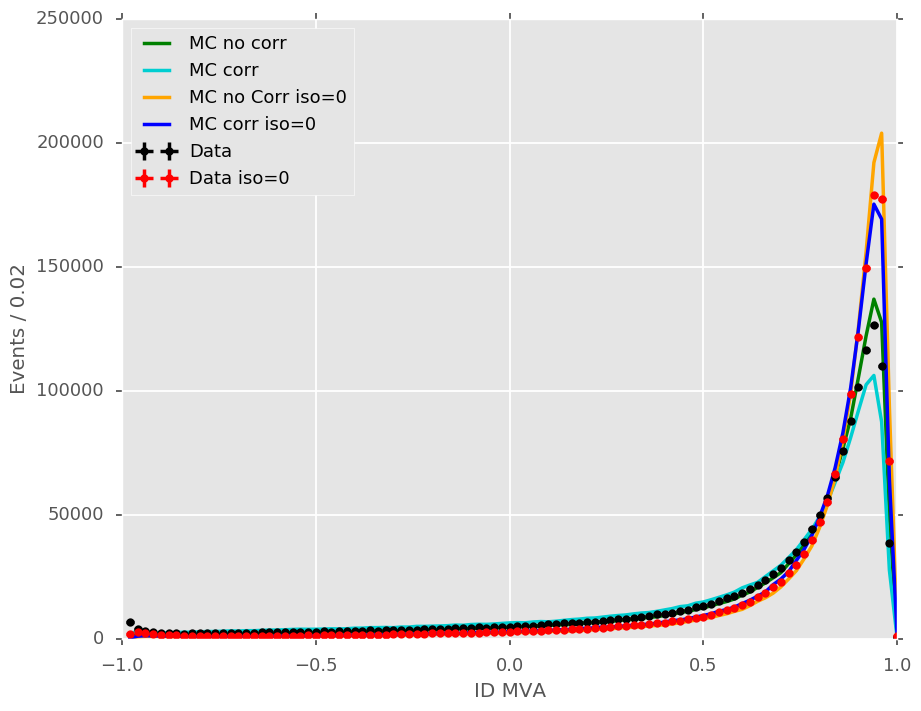

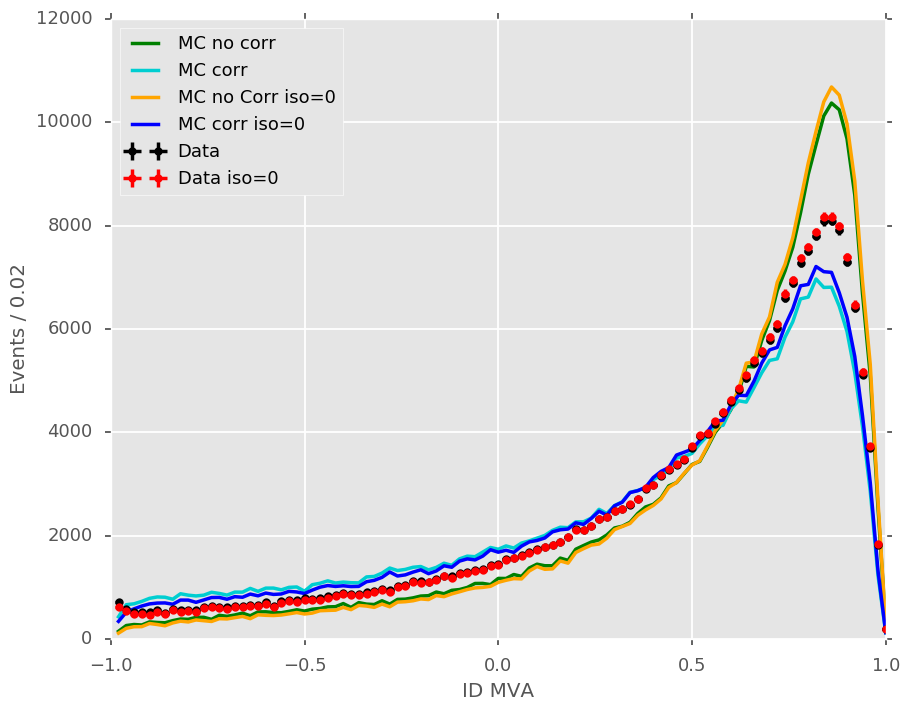

In [47]:
bins = np.linspace(-1,1,101)
var = 'moriondPhoID'
mclabels = [ '', 'corrAll', 'Iso0', 'Iso0corrAll']
mcstyles = [ dict(label='MC no corr',color='green'), 
             dict(label='MC corr ',color='darkturquoise'), 
             dict(label='MC no Corr iso=0',color='orange'),
             dict(label='MC corr iso=0',color='blue'), 
           ]

for dfs in [ (dfEB,dfmcEB,dfIsoEB), (dfEE,dfmcEE,dfIsoEE) ]: 
    data1, mc = plot.data_mc(dfs[0],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    data2, mc = plot.data_mc(dfs[2],dfs[1],var,bins,weight="weight",mclabels=mclabels)
    draw_datas_mc(bins, data1, data2, zip(mc,mcstyles), var='ID MVA', markersize=6, alpha=1, linewidth=2.5, ratio=False, figsize=(10,8))
  

In [46]:
def draw_datas_mc(bins,data1,data2, mc,figsize=(8,6),var=None,logy=False,ratio=False,
                **kwargs):
    
    mcstyle=dict(alpha=0.5,linewidth=0)
    mcstyle.update(kwargs)
    datastyle=cp.copy(kwargs)
    datastyle["alpha"] = 1. # No transparency for data
    
    binw=bins[1]-bins[0]
    if ratio:
        fig, axes = plt.subplots(2,figsize=figsize,sharex=True,gridspec_kw = {'height_ratios':[3, 1]})
        top = axes[0]
        bottom = axes[1]
        fig.tight_layout()
    else:
        fig = plt.figure(figsize=figsize)
        axes = None
        top = plt
    
    # FIXME: assumes uniform binning
    xc = bins[1:]-binw*0.5
    
    #print mc
    for hist, style in mc:
        pkwargs = cp.copy(mcstyle)
        pkwargs.update(style)
        top.plot(xc+binw*0.5,hist,**pkwargs)
    top.errorbar( xc+binw*0.5, data1,ls='None', xerr=np.ones_like(data1)*binw*0.5, yerr=np.sqrt(data1), color='black', 
                 label='Data', fmt='o', **datastyle )
    top.errorbar( xc+binw*0.5, data2,ls='None', xerr=np.ones_like(data2)*binw*0.5, yerr=np.sqrt(data2), color='red', 
                 label='Data iso=0', fmt='o', **datastyle )
        
    if axes == None: axes = fig.axes
    
    if ratio:
        ratios = []
        for hist, style in mc:
            rdata = data / hist
            rdata_err = np.sqrt(data) / hist
            ratios.append((rdata,rdata_err))
            rkwargs = {}
            if len(mc) == 1: rkwargs['color'] = 'black'
            elif "color" in style: rkwargs['color'] = style['color']
            rkwargs.update(datastyle)
            bottom.errorbar( xc+binw*0.5, rdata,ls='None', xerr=np.ones_like(rdata)*binw*0.5, yerr=rdata_err, 
                        **rkwargs)
        
        bottom.plot( (bins[0],bins[-1]), (1,1), 'k-' )
        bottom.set_ylabel('Data / MC')
        bottom.set_ylim(0,2)
    
    if logy:
        axes[0].set_yscale('log')
    axes[0].set_xlim(bins[0],bins[-1])
    
    unit = None    
    if var != None:
        if type(var) != str:
            var, unit = var
        if unit: var += " (%s)" % unit
        axes[-1].set_xlabel(var)
    ylabel = 'Events / %1.3g' % binw
    if unit:
        ylabel += ' %s' % unit
    axes[0].set_ylabel(ylabel)

    top.legend(loc='best')
        

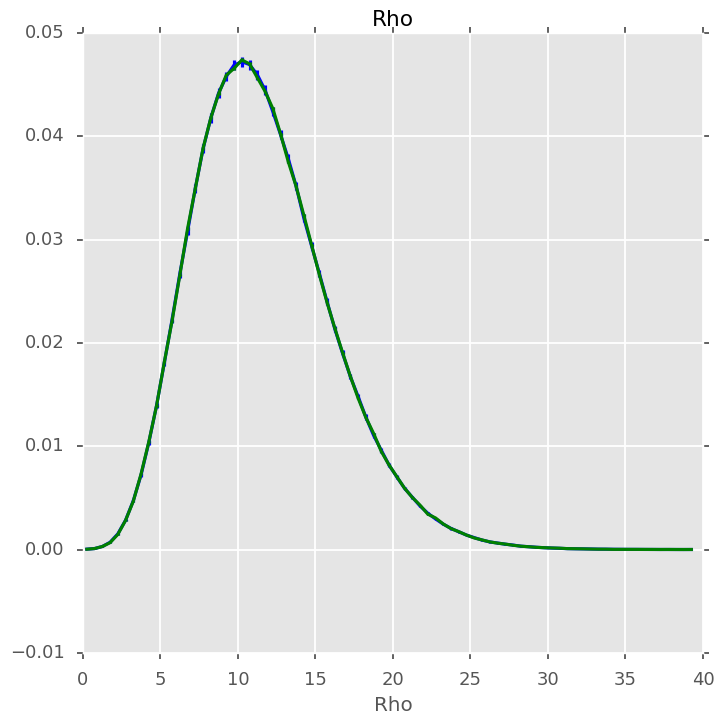

In [48]:
#Check if now Rho Match
rv=np.arange(0,40,0.5)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho")
plot.plotHistErr(dfmc.loc[:,"rho"], rv,Color="b", Weight=dfmc["weight"])

plot.plotHistErr(dfdata.loc[:,"rho"], rv,Color="g",Weight=dfdata["weight"])
ax.set_title("Rho")